## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   3.716408  1154.804705  0.001551  3.300792  0.383523
1  57.262095  1360.160429  0.097209  3.588331  0.977208
2  52.657672  1248.617317  0.727132  9.435662  1.609987
3  69.441946  1077.142493  0.268774  1.088902  1.436580
4  25.140113   682.118852  0.526399  4.020785  1.504220


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0152732	total: 61.6ms	remaining: 1m 1s
1:	learn: 1.0050888	total: 62.3ms	remaining: 31.1s
2:	learn: 0.9962016	total: 62.9ms	remaining: 20.9s


3:	learn: 0.9855837	total: 63.6ms	remaining: 15.8s
4:	learn: 0.9764853	total: 68.6ms	remaining: 13.6s
5:	learn: 0.9659972	total: 70ms	remaining: 11.6s
6:	learn: 0.9541556	total: 70.7ms	remaining: 10s
7:	learn: 0.9443717	total: 71.2ms	remaining: 8.83s
8:	learn: 0.9346889	total: 71.8ms	remaining: 7.9s
9:	learn: 0.9270768	total: 72.3ms	remaining: 7.16s
10:	learn: 0.9193136	total: 73.2ms	remaining: 6.58s
11:	learn: 0.9099354	total: 73.9ms	remaining: 6.08s
12:	learn: 0.9031748	total: 74.4ms	remaining: 5.64s
13:	learn: 0.8931672	total: 74.9ms	remaining: 5.27s
14:	learn: 0.8849254	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8782626	total: 76ms	remaining: 4.67s
16:	learn: 0.8681834	total: 76.7ms	remaining: 4.43s
17:	learn: 0.8609116	total: 77.3ms	remaining: 4.21s
18:	learn: 0.8541783	total: 77.6ms	remaining: 4.01s
19:	learn: 0.8454357	total: 78.1ms	remaining: 3.83s
20:	learn: 0.8374187	total: 78.7ms	remaining: 3.67s
21:	learn: 0.8300225	total: 79.2ms	remaining: 3.52s
22:	learn: 0.8222591	total

202:	learn: 0.2379629	total: 162ms	remaining: 635ms
203:	learn: 0.2368699	total: 162ms	remaining: 633ms
204:	learn: 0.2360279	total: 163ms	remaining: 631ms
205:	learn: 0.2350391	total: 163ms	remaining: 628ms
206:	learn: 0.2334599	total: 163ms	remaining: 626ms
207:	learn: 0.2323032	total: 164ms	remaining: 624ms
208:	learn: 0.2314736	total: 164ms	remaining: 622ms
209:	learn: 0.2302803	total: 165ms	remaining: 620ms
210:	learn: 0.2293107	total: 165ms	remaining: 617ms
211:	learn: 0.2282372	total: 166ms	remaining: 616ms
212:	learn: 0.2274550	total: 166ms	remaining: 613ms
213:	learn: 0.2261087	total: 166ms	remaining: 611ms
214:	learn: 0.2251210	total: 167ms	remaining: 609ms
215:	learn: 0.2239790	total: 167ms	remaining: 607ms
216:	learn: 0.2233535	total: 168ms	remaining: 605ms
217:	learn: 0.2225835	total: 168ms	remaining: 603ms
218:	learn: 0.2216696	total: 168ms	remaining: 601ms
219:	learn: 0.2207002	total: 169ms	remaining: 599ms
220:	learn: 0.2199268	total: 169ms	remaining: 597ms
221:	learn: 

323:	learn: 0.1445630	total: 213ms	remaining: 445ms
324:	learn: 0.1439263	total: 214ms	remaining: 444ms
325:	learn: 0.1434703	total: 214ms	remaining: 443ms
326:	learn: 0.1428733	total: 215ms	remaining: 442ms
327:	learn: 0.1426960	total: 215ms	remaining: 441ms
328:	learn: 0.1425465	total: 215ms	remaining: 439ms
329:	learn: 0.1419500	total: 216ms	remaining: 438ms
330:	learn: 0.1415384	total: 216ms	remaining: 437ms
331:	learn: 0.1411342	total: 217ms	remaining: 436ms
332:	learn: 0.1407374	total: 217ms	remaining: 435ms
333:	learn: 0.1401280	total: 217ms	remaining: 433ms
334:	learn: 0.1397408	total: 218ms	remaining: 432ms
335:	learn: 0.1393324	total: 218ms	remaining: 431ms
336:	learn: 0.1391923	total: 218ms	remaining: 430ms
337:	learn: 0.1384136	total: 219ms	remaining: 429ms
338:	learn: 0.1380453	total: 219ms	remaining: 428ms
339:	learn: 0.1376522	total: 220ms	remaining: 427ms
340:	learn: 0.1370745	total: 220ms	remaining: 426ms
341:	learn: 0.1364158	total: 221ms	remaining: 425ms
342:	learn: 

512:	learn: 0.0767536	total: 311ms	remaining: 296ms
513:	learn: 0.0763770	total: 312ms	remaining: 295ms
514:	learn: 0.0759696	total: 313ms	remaining: 294ms
515:	learn: 0.0758131	total: 313ms	remaining: 294ms
516:	learn: 0.0757696	total: 313ms	remaining: 293ms
517:	learn: 0.0757266	total: 314ms	remaining: 292ms
518:	learn: 0.0753710	total: 314ms	remaining: 291ms
519:	learn: 0.0753285	total: 315ms	remaining: 291ms
520:	learn: 0.0749366	total: 315ms	remaining: 290ms
521:	learn: 0.0748945	total: 316ms	remaining: 289ms
522:	learn: 0.0748019	total: 316ms	remaining: 289ms
523:	learn: 0.0744610	total: 317ms	remaining: 288ms
524:	learn: 0.0744199	total: 318ms	remaining: 288ms
525:	learn: 0.0743793	total: 318ms	remaining: 287ms
526:	learn: 0.0740374	total: 319ms	remaining: 286ms
527:	learn: 0.0737108	total: 319ms	remaining: 286ms
528:	learn: 0.0736706	total: 320ms	remaining: 285ms
529:	learn: 0.0736309	total: 320ms	remaining: 284ms
530:	learn: 0.0732644	total: 321ms	remaining: 283ms
531:	learn: 

637:	learn: 0.0537808	total: 368ms	remaining: 209ms
638:	learn: 0.0536561	total: 369ms	remaining: 208ms
639:	learn: 0.0533914	total: 369ms	remaining: 208ms
640:	learn: 0.0533112	total: 370ms	remaining: 207ms
641:	learn: 0.0530597	total: 370ms	remaining: 206ms
642:	learn: 0.0529816	total: 371ms	remaining: 206ms
643:	learn: 0.0529049	total: 371ms	remaining: 205ms
644:	learn: 0.0526505	total: 371ms	remaining: 204ms
645:	learn: 0.0525755	total: 372ms	remaining: 204ms
646:	learn: 0.0525291	total: 372ms	remaining: 203ms
647:	learn: 0.0522875	total: 373ms	remaining: 202ms
648:	learn: 0.0522143	total: 373ms	remaining: 202ms
649:	learn: 0.0521424	total: 374ms	remaining: 201ms
650:	learn: 0.0520967	total: 374ms	remaining: 200ms
651:	learn: 0.0518522	total: 374ms	remaining: 200ms
652:	learn: 0.0518072	total: 375ms	remaining: 199ms
653:	learn: 0.0516801	total: 375ms	remaining: 199ms
654:	learn: 0.0514484	total: 376ms	remaining: 198ms
655:	learn: 0.0513739	total: 376ms	remaining: 197ms
656:	learn: 

868:	learn: 0.0303804	total: 473ms	remaining: 71.3ms
869:	learn: 0.0303450	total: 474ms	remaining: 70.8ms
870:	learn: 0.0303104	total: 474ms	remaining: 70.2ms
871:	learn: 0.0301396	total: 475ms	remaining: 69.7ms
872:	learn: 0.0299679	total: 475ms	remaining: 69.1ms
873:	learn: 0.0298747	total: 476ms	remaining: 68.6ms
874:	learn: 0.0297837	total: 476ms	remaining: 68ms
875:	learn: 0.0297267	total: 476ms	remaining: 67.4ms
876:	learn: 0.0296976	total: 477ms	remaining: 66.9ms
877:	learn: 0.0296088	total: 478ms	remaining: 66.4ms
878:	learn: 0.0295802	total: 479ms	remaining: 65.9ms
879:	learn: 0.0294898	total: 479ms	remaining: 65.3ms
880:	learn: 0.0294017	total: 479ms	remaining: 64.8ms
881:	learn: 0.0293438	total: 480ms	remaining: 64.2ms
882:	learn: 0.0292812	total: 480ms	remaining: 63.6ms
883:	learn: 0.0292255	total: 481ms	remaining: 63.1ms
884:	learn: 0.0291709	total: 481ms	remaining: 62.5ms
885:	learn: 0.0291437	total: 482ms	remaining: 62ms
886:	learn: 0.0289791	total: 482ms	remaining: 61.4

961:	learn: 0.0234219	total: 526ms	remaining: 20.8ms
962:	learn: 0.0233220	total: 527ms	remaining: 20.3ms


963:	learn: 0.0232441	total: 530ms	remaining: 19.8ms
964:	learn: 0.0231477	total: 531ms	remaining: 19.2ms
965:	learn: 0.0230959	total: 532ms	remaining: 18.7ms
966:	learn: 0.0230342	total: 533ms	remaining: 18.2ms
967:	learn: 0.0230143	total: 535ms	remaining: 17.7ms
968:	learn: 0.0229318	total: 536ms	remaining: 17.2ms
969:	learn: 0.0228812	total: 538ms	remaining: 16.6ms
970:	learn: 0.0228212	total: 539ms	remaining: 16.1ms
971:	learn: 0.0227716	total: 540ms	remaining: 15.6ms
972:	learn: 0.0227384	total: 541ms	remaining: 15ms
973:	learn: 0.0226773	total: 542ms	remaining: 14.5ms
974:	learn: 0.0226410	total: 542ms	remaining: 13.9ms
975:	learn: 0.0226215	total: 543ms	remaining: 13.4ms
976:	learn: 0.0225964	total: 544ms	remaining: 12.8ms
977:	learn: 0.0225772	total: 544ms	remaining: 12.2ms
978:	learn: 0.0224813	total: 545ms	remaining: 11.7ms
979:	learn: 0.0224567	total: 545ms	remaining: 11.1ms
980:	learn: 0.0224220	total: 546ms	remaining: 10.6ms
981:	learn: 0.0223306	total: 546ms	remaining: 10

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.33682839347511495


ABC Pre-generator MAE 0.35270057830062773


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

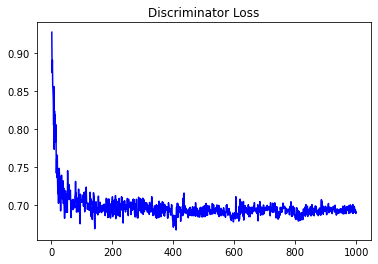

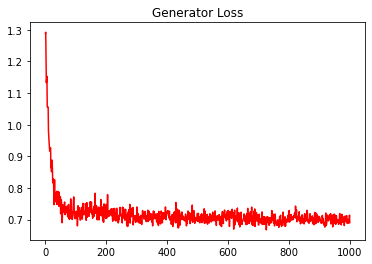

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5716434478433803


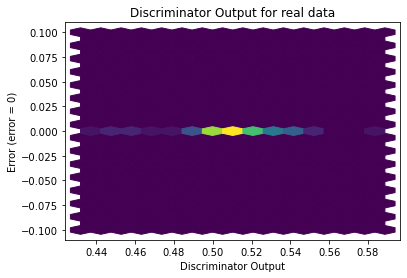

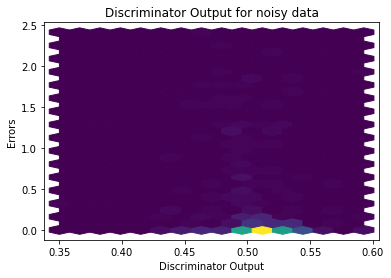

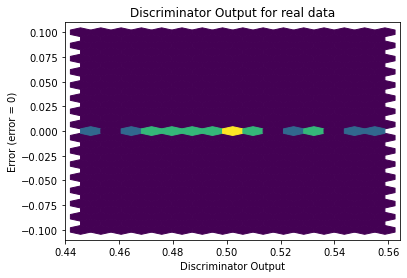

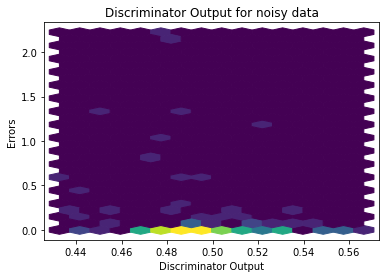

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

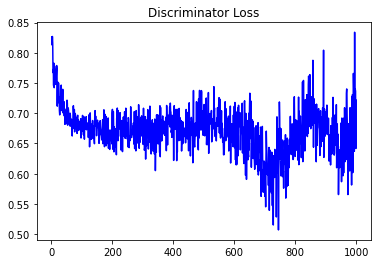

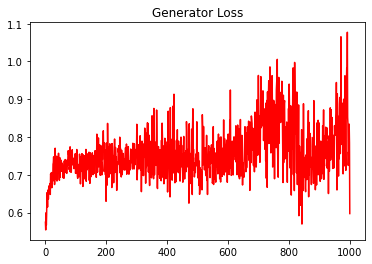

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.0729297608155757


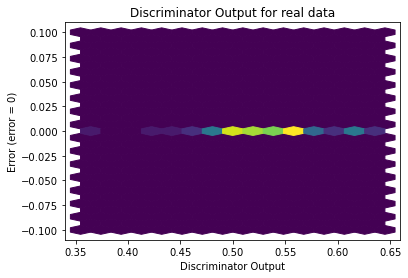

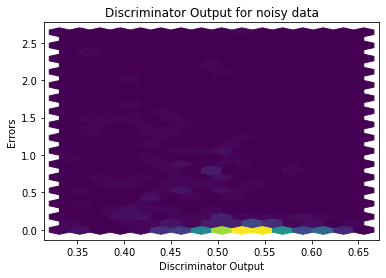

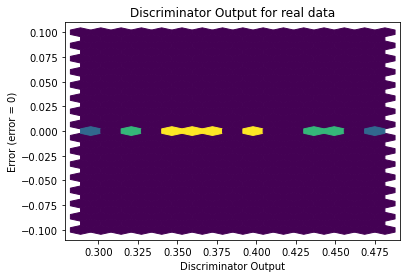

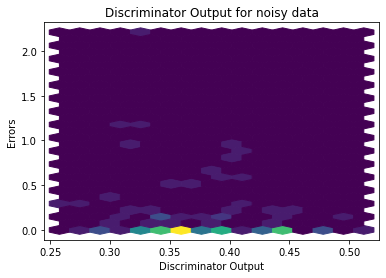

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


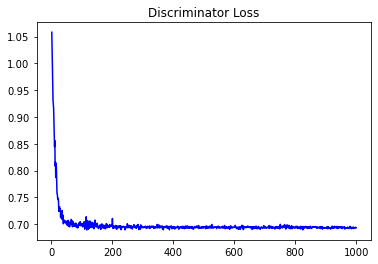

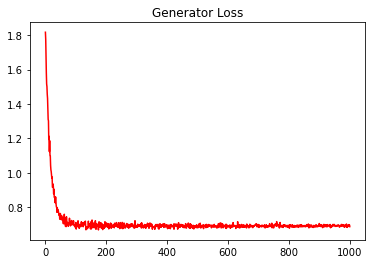

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.34710652752639726


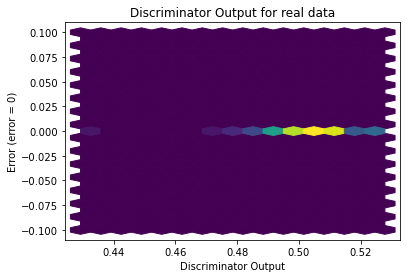

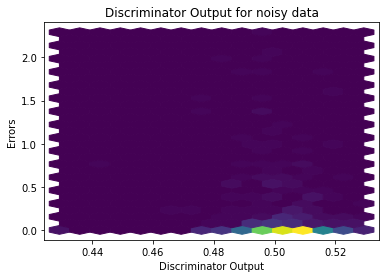

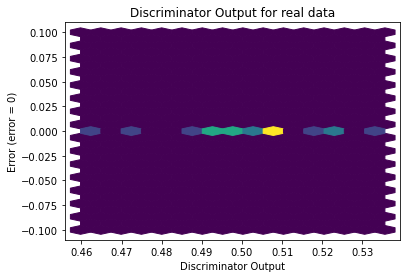

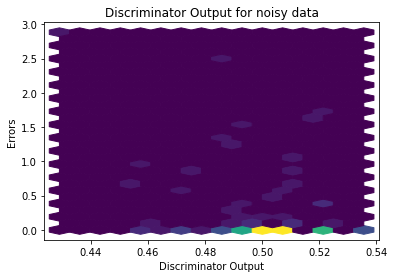

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


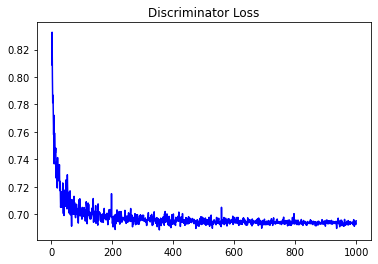

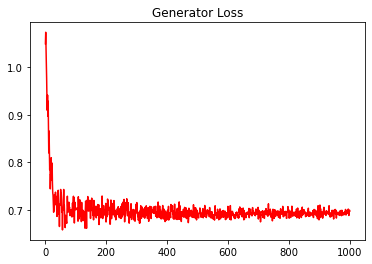

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3619758233129978


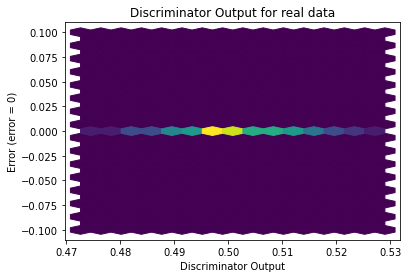

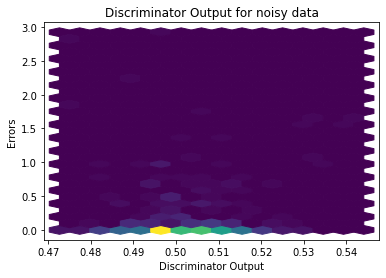

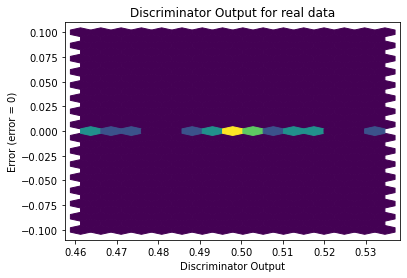

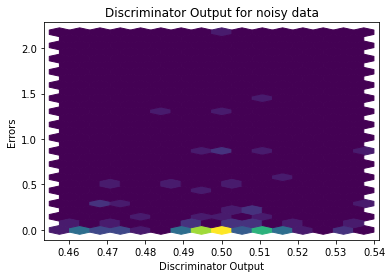

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0794]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0302]], requires_grad=True)
